In [4]:
zip_path = '/content/drive/MyDrive/Leaf_disease/archive (1).zip'


Extraction of ZIP FILE


In [6]:
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')  # Specify the target folder where files will be extracted


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Leaf_disease/archive (1).zip'

Printing the first 5 images in the Dataset

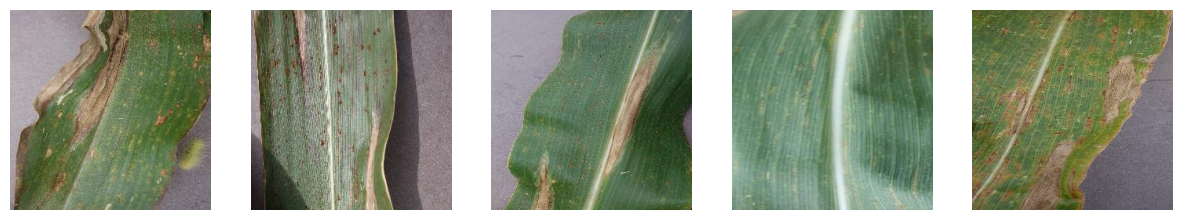

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import glob

# Load the image paths
image_files = glob.glob(os.path.join('/content/dataset', '**/*.jpg'), recursive=True)[:5]  # Get the first 5 images, recursively searching for .jpg files

# Display the images
plt.figure(figsize=(15, 5))
for i, image_file in enumerate(image_files):
    img = Image.open(image_file)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

Importing neccessary Libraries


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam


from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.resnet import ResNet101
from tensorflow.keras.applications import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import EfficientNetV2L

import random
import os
import warnings
warnings.filterwarnings('ignore')
print('complete')

complete


# **Loading and Preprocessing**

In [5]:
image_shape = (225,225)
batch_size = 64
# Verify the correct path to your training data
train_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "/content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_dir = "/content/dataset/test/test"

# apply scaling only becouse data already augmented
train_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# load training data
print("Training Images:")
# Check if the directory exists before proceeding
if os.path.exists(train_dir):
    train_data = train_datagen.flow_from_directory(train_dir,
                                                   target_size=image_shape,
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True,
                                                   subset='training')
else:
    print(f"Error: Training directory not found: {train_dir}")
    # Handle the error, e.g., exit or raise an exception

# load validation data (20% of training data)
print("Validating Images:")
# Check if the directory exists before proceeding
if os.path.exists(train_dir):  # Note: Using train_dir for validation data subset
    valid_data = train_datagen.flow_from_directory(train_dir,
                                                   target_size=image_shape,
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=False,
                                                   subset='validation')
else:
    print(f"Error: Validation directory not found: {train_dir}")
    # Handle the error, e.g., exit or raise an exception

# load test data (consider validation data as test data)
print('Test Images:')
# Check if the directory exists before proceeding
if os.path.exists(valid_dir):
    test_data = test_datagen.flow_from_directory(valid_dir,
                                                   target_size=image_shape,
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=False)
else:
    print(f"Error: Test directory not found: {valid_dir}")
    # Handle the error, e.g., exit or raise an exception

Training Images:
Found 56251 images belonging to 38 classes.
Validating Images:
Found 14044 images belonging to 38 classes.
Test Images:
Found 17572 images belonging to 38 classes.


In [6]:
# show how data store
images, labels = next(iter(train_data))
print(f'shape of image is : {images[0].shape}')
print(f'label  \n{labels[0]}')

shape of image is : (225, 225, 3)
label  
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Listing No of Diseases

In [7]:
# show all diseases in dataset
diseases = os.listdir(train_dir)
print(diseases)

['Blueberry___healthy', 'Tomato___Leaf_Mold', 'Potato___Early_blight', 'Pepper,_bell___healthy', 'Potato___Late_blight', 'Orange___Haunglongbing_(Citrus_greening)', 'Raspberry___healthy', 'Tomato___healthy', 'Strawberry___healthy', 'Apple___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Esca_(Black_Measles)', 'Tomato___Early_blight', 'Grape___Black_rot', 'Cherry_(including_sour)___healthy', 'Squash___Powdery_mildew', 'Apple___Black_rot', 'Corn_(maize)___healthy', 'Grape___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Late_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Corn_(maize)___Common_rust_', 'Pepper,_bell___Bacterial_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Soybean___healthy', 'Tomato___Septoria_leaf_spot', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Apple_scab', 'Strawberry___Leaf_scorch', 'Peach___Bacterial_spot', 'Tomato___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Potato___healthy', 'Apple___Cedar

### Different Types of plants present in the Dataset

In [8]:
# identify uniqe plant in dataset
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
print(f'number of different plants is :{len(plants)}')
print(plants)

number of different plants is :14
['Blueberry', 'Tomato', 'Potato', 'Pepper,_bell', 'Orange', 'Raspberry', 'Strawberry', 'Apple', 'Corn_(maize)', 'Grape', 'Cherry_(including_sour)', 'Squash', 'Soybean', 'Peach']


### Images Containing in Different classes

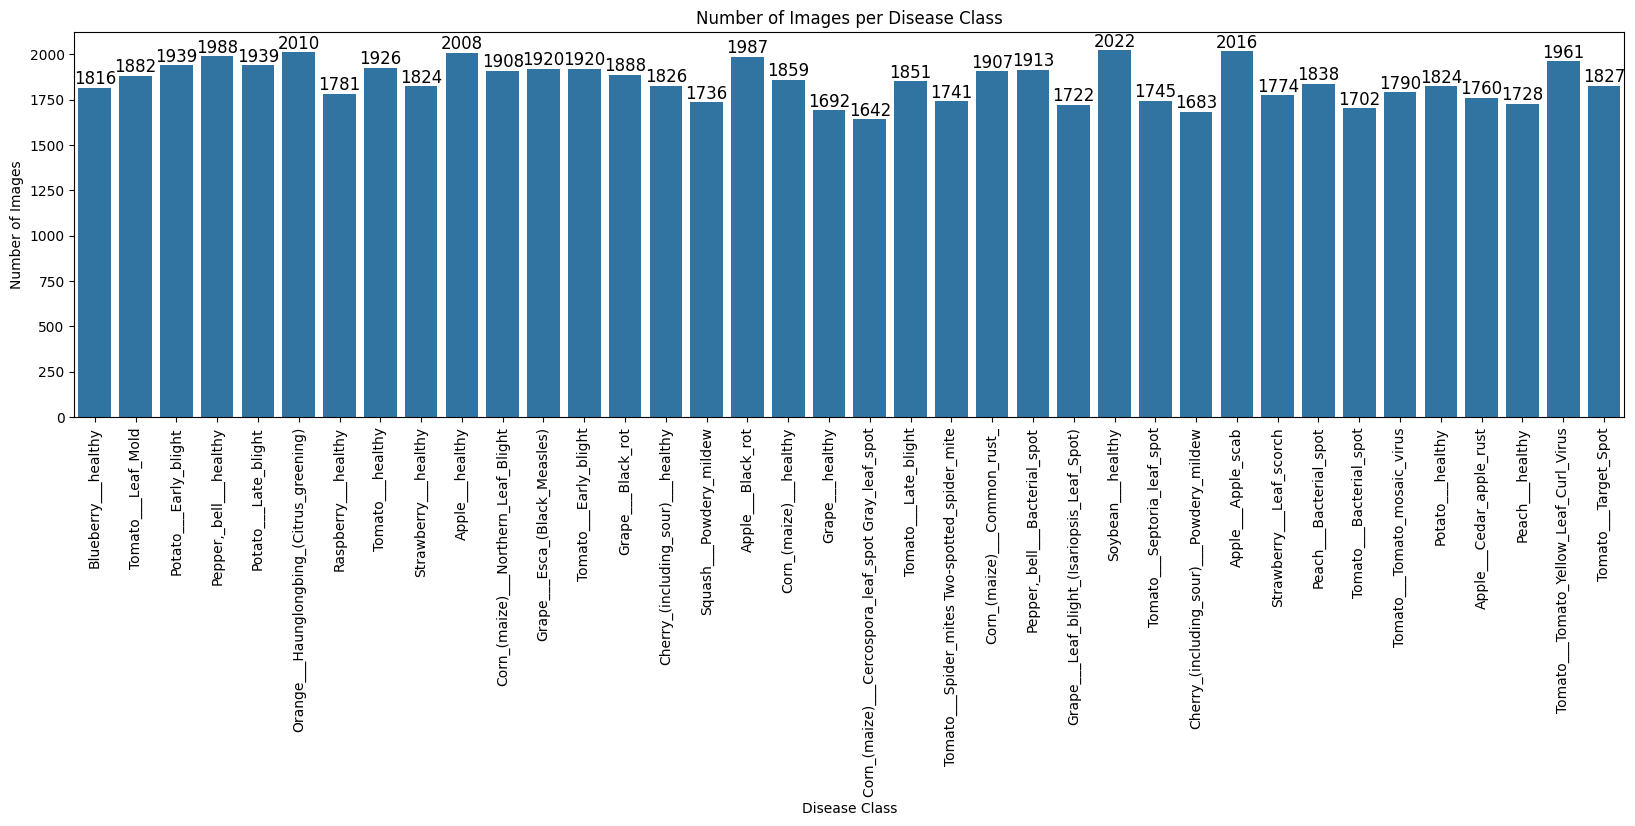

In [9]:
# show number of each class
dic = {}
for Class in diseases:
    dic[Class] = len(os.listdir(train_dir + '/' + Class))

df = pd.DataFrame(list(dic.items()), columns=["Disease Class", "Number of Images"])

# df = df.sort_values(by="Number of Images", ascending=False)

plt.figure(figsize=(20, 5))
bar_plot = sns.barplot(data=df, x='Disease Class', y='Number of Images')
plt.xticks(rotation=90)
plt.title('Number of Images per Disease Class')

# Adding the count above each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center',
                      va='bottom',
                      fontsize=12,
                      color='black',
                      rotation=0)

plt.show()

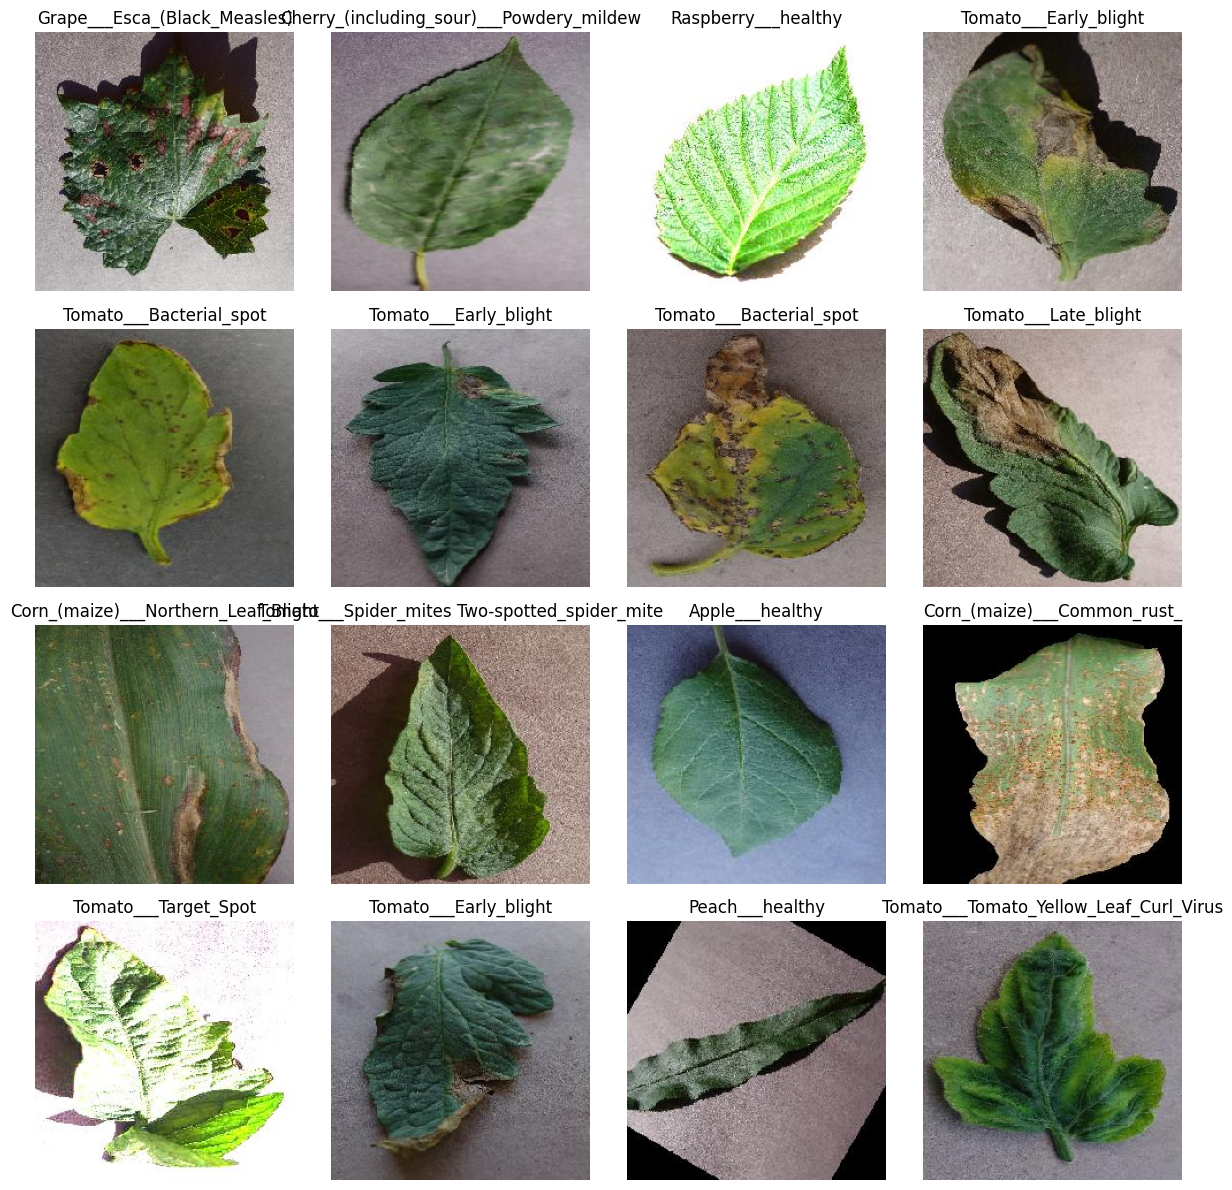

In [10]:
import random
# select a specific batch
images, labels = next(iter(train_data))

# select 16 image by random
indices = random.sample(range(len(images)), 16)
selected_images = images[indices]
selected_labels = labels[indices]

class_names = list(train_data.class_indices.keys())

# plotting
plt.figure(figsize=(12, 12))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(selected_images[i])
    plt.title(class_names[np.argmax(selected_labels[i])])
    plt.axis("off")

plt.tight_layout()
plt.show()


## Using Pretrained model VGG_16

In [11]:
# use VGG16 from Keres
vgg_16 = VGG16(weights = "imagenet", include_top=False, input_shape = (225,225, 3))

# iterate through its layers and frezzing them expect the last block (last 5 layers)
for layer in vgg_16.layers[:-5]:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
# take the last layer from VGG16 and link it with my fully connected layer
last_output = vgg_16.output

# take the last layer from VGG16 and link it with my fully connected layer
x = GlobalAveragePooling2D()(last_output)

x = Dense(256, activation='elu', kernel_initializer=GlorotNormal())(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu', kernel_initializer=GlorotNormal())(x)
x = Dropout(0.2)(x)

x = Dense(64, activation='elu', kernel_initializer=GlorotNormal())(x)
x = BatchNormalization()(x)


x = Dense(38, activation='softmax')(x)


vgg_model = Model(inputs=vgg_16.input, outputs=x)

vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 225, 225, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 225, 225, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 225, 225, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,3

 Total params: 14,930,982 (56.96 MB)

 Trainable params: 7,295,590 (27.83 MB)

 Non-trainable params: 7,635,392 (29.13 MB)

In [ ]:
# train the model
model_checkpoint = ModelCheckpoint('/kaggle/working/vgg_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

history =vgg_model.fit(train_data,
                        validation_data=valid_data,
                        epochs=10,
                        batch_size=64,
                        callbacks=[model_checkpoint, early_stopping])

Epoch 1/10
 16/879 ━━━━━━━━━━━━━━━━━━━━ 12:02:43 50s/step - accuracy: 0.0338 - loss: 4.0970

KeyboardInterrupt: 

In [ ]:
## save model to use later
vgg_model.save('/kaggle/working/vgg_model.keras') # Changed 'model' to 'vgg_model'

In [ ]:
# show learning curves
plot_learning_curves(history)

In [ ]:
# showe accuracy on test data
best_model = load_model('/kaggle/working/vgg_model.keras')

test_loss, test_accuracy = best_model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the trained model
model = load_model('/kaggle/working/vgg_model.keras')

# Define a function to preprocess the image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(225, 225))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Normalize pixel values
    return img_array

# Load and preprocess the image you want to test
image_path = '/content/dataset/test/test/image1.jpg'  # Replace with the actual path
img_array = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(img_array)

# Get the class with the highest probability
predicted_class_index = np.argmax(prediction)

# Assuming you have a mapping from class index to class name
class_names = list(train_data.class_indices.keys())  # Assuming train_data is defined earlier
predicted_class_name = class_names[predicted_class_index]

# Print the prediction
print(f"The predicted class is: {predicted_class_name}")

# Logic to handle specific disease outcomes
known_classes = {
    'Healthy': "The plant is healthy.",
    'Rust': "The plant has rust disease.",
    'Powdery Mildew': "The plant has powdery mildew."
}

# Check if predicted class is in known_classes
if predicted_class_name in known_classes:
    print(known_classes[predicted_class_name])
else:
    print(f"The predicted class is: {predicted_class_name}")
    print("This class is not one of the known diseases.")


## Prediction

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def segment_leaves(image):
    """
    Segment the leaves from the input image using color thresholding and morphological operations.

    Args:
    - image: Input image in RGB format.

    Returns:
    - mask: Binary mask representing the presence of leaves.
    """
    # Convert the image to HSV color space for better segmentation
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Define the range of green color in HSV (tuned to better represent leaf green)
    lower_green = np.array([35, 50, 50])
    upper_green = np.array([85, 255, 255])

    # Create a binary mask where green colors are within the range
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Apply morphological operations to clean up the mask
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Close small holes
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)   # Remove small noise

    return mask

def process_image(image_path):
    """
    Process the input image to detect leaves. If no leaves are found, returns None.

    Args:
    - image_path: Path to the input image.

    Returns:
    - result: Dictionary containing processed image information or None if no leaves are detected.
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not load image at {image_path}")
        return None

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform leaf segmentation
    mask = segment_leaves(image)

    # Check if any leaves are detected
    if np.sum(mask) == 0:
        print("Leaf is not present in the image")
        return None

    # Find contours of the segmented leaves
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours that are likely not leaves
    min_leaf_area = 500  # Threshold for minimum area to consider as a leaf
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_leaf_area]

    if len(filtered_contours) == 0:
        print("Leaf is not present in the image after filtering small regions")
        return None

    # Calculate leaf areas and other metrics
    leaf_areas = [cv2.contourArea(cnt) for cnt in filtered_contours]
    total_leaf_area = sum(leaf_areas)
    image_area = image.shape[0] * image.shape[1]
    leaf_coverage = (total_leaf_area / image_area) * 100 if image_area > 0 else 0

    return {
        'image': image,
        'mask': mask,
        'contours': filtered_contours,
        'leaf_areas': leaf_areas,
        'total_leaf_area': total_leaf_area,
        'image_area': image_area,
        'leaf_coverage': leaf_coverage
    }

# Example usage
if __name__ == "__main__":
    image_path = '/content/dataset/test/test/image2.jpeg'  # Replace with your image path
    result = process_image(image_path)
    if result is not None:
        print(f"Total leaf area: {result['total_leaf_area']}")
        print(f"Leaf coverage: {result['leaf_coverage']}%")
        # Use cv2_imshow instead of cv2.imshow
        cv2_imshow(result['mask']) # Changed cv2.imshow to cv2_imshow


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model  # Import load_model

# Load your model here
model = load_model('/kaggle/working/vgg_model.keras')
def load_and_preprocess_image(location):
    """Loads an image from the given location and preprocesses it."""
    img = load_img(location, target_size=(225, 225))  # Correct target_size to (225, 225)
    img = img_to_array(img)
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def output(location):
    # Load and preprocess the image
    img = load_and_preprocess_image(location)
    predict_x = model.predict(img)
    classes_x = np.argmax(predict_x, axis=1)

    predicted_index = classes_x[0]
    print(f'Predicted Class Index: {predicted_index}')

    # Safely access the class name
    if predicted_index in icd:
        predicted_class = icd[predicted_index]
        print('Predicted Class:', predicted_class)
        return predicted_class  # Return the predicted class name
    else:
        print(f'Error: Predicted index {predicted_index} does not exist in icd.')
        return None  # Return None if not found

# Example usage
test_img = '/content/dataset/test/test/image3.jpeg'  # Replace with your image path
predicted_class_name = output(test_img)  # Get the predicted class name

# Plot the image with the predicted class name as title
pic = load_img(test_img, target_size=(225, 225))  # Update size if necessary
plt.imshow(pic)
if predicted_class_name:
    plt.title(f'Predicted Class: {predicted_class_name}')  # Add title with predicted class
plt.axis('off')  # Hide axes
plt.show()  # Display the image


In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('/kaggle/working/vgg_model.keras')

# Define a mapping from class indices to disease names
class_names = {
    0: 'Healthy',
    1: 'Rust',
    2: 'Powdery Mildew',
    # Add all other classes according to your dataset
    3: 'Class4',
    4: 'Class5',
    # ...
    37: 'Class38'
}

# Define a function to preprocess the image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(225, 225))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Normalize pixel values
    return img_array

def output(location):
    # Load and preprocess the image
    img = preprocess_image(location)
    predict_x = model.predict(img)
    classes_x = np.argmax(predict_x, axis=1)

    predicted_index = classes_x[0]

    # Use the predefined class_names mapping
    if predicted_index in class_names:
        predicted_class_name = class_names[predicted_index]
    else:
        predicted_class_name = "Unknown Class"  # Fallback for unmapped indices

    # Print the prediction
    print(f'The predicted class is: {predicted_class_name}')

    # Display the image with the predicted class name
    img_to_show = load_img(location, target_size=(225, 225))
    plt.imshow(img_to_show)
    plt.title(f"Predicted Disease: {predicted_class_name}")
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Example usage
test_img = '/content/dataset/test/test/image1.jpg'  # Replace with your image path
output(test_img)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# ... (process_image function from ipython-input-54-4a00a9bd1fad remains unchanged) ...

test_img = '/content/dataset/test/test/image1.jpg'
pic = load_img(test_img, target_size=(225, 225, 3))
plt.imshow(pic)

# Call process_image instead of the undefined 'output' function
result = process_image(test_img)

In [ ]:
%pip install pyngrok

In [ ]:
!ngrok config add-authtoken "2mq8gi9mLq9WeflF6VjEgHiqCaI_5nfU6J6MaaF1KK4nmojZ9"

In [ ]:
from pyngrok import ngrok

# Start an ngrok tunnel
public_url = ngrok.connect(5000)
print(f"Public URL: {public_url}")


In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
from io import BytesIO
from pyngrok import ngrok

# Load your trained model
model = load_model('leaf_disease_model.h5')
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Create a Flask app
app = Flask(__name__)

# Mapping of class indices to class names
classes = {'healthy': 0, 'rusty': 1, 'powdery': 2}
icd = {v: k for k, v in classes.items()}

# Function to make predictions
def predict_class(image):
    # Resize and preprocess the image
    image = image.resize((225, 225))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    # Make predictions
    predictions = model.predict(image)
    print(predictions)
    predicted_class = np.argmax(predictions, axis=1)[0]

    return icd[predicted_class]

# Route for prediction
@app.route('/predict', methods=['POST'])
def predict():
    # Check if the image is part of the request
    if 'file' not in request.files:
        return jsonify({'error': 'No file uploaded'}), 400

    # Get the image file from the request
    file = request.files['file']

    try:
        # Open the image from the file (in memory)
        image = Image.open(BytesIO(file.read()))
    except Exception as e:
        return jsonify({'error': f'Invalid image: {str(e)}'}), 400

    # Predict the class of the image
    predicted_class = predict_class(image)

    # Return the result as JSON
    return jsonify({'predicted_class': predicted_class})

# Main function to run the app
if __name__ == '__main__':
    # Start the Flask app
    public_url = ngrok.connect(5000)  # Expose the Flask app via ngrok
    print(f"Public URL: {public_url}")
    app.run(host='0.0.0.0', port=5000)
